In [101]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('../titanic_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [5]:
df['Cabin_Class'] = df['Cabin'].str[0]
df['Cabin_Class'] = df['Cabin_Class'].fillna('na')

df['Embarked'] = df['Embarked'].astype(str)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Class
0,0,3,male,22.0,1,0,7.2500,NaN,S,na
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,na
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,na


In [6]:
se = LabelEncoder().fit(df['Sex'])
ee = LabelEncoder().fit(df['Embarked'])
ce = LabelEncoder().fit(df['Cabin_Class'])

In [7]:
df.drop('Cabin', axis=1, inplace=True)

In [8]:
model = XGBClassifier(max_depth=len(df.columns))

In [9]:
df['Sex'] = se.transform(df['Sex'])
df['Embarked'] = ee.transform(df['Embarked'])
df['Cabin_Class'] = ce.transform(df['Cabin_Class'])

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Class
0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,8
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,8


In [107]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
X_train, X_test, y_train, y_test = X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()

c:\users\zbloss\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [110]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [111]:
preds = model.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [113]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       123
           1       0.80      0.65      0.72        92

   micro avg       0.78      0.78      0.78       215
   macro avg       0.79      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215



In [19]:
import lime
import lime.lime_tabular

In [21]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train, 
                                                   mode='classification',  
                                                   feature_names=X.columns, class_names=[0, 1])

c:\users\zbloss\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [22]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_Class'],
      dtype='object')

In [23]:
exp = explainer.explain_instance(X_test[5], model.predict_proba, num_features=8)

In [24]:
exp.show_in_notebook()

In [25]:
# First Plot
model.predict_proba([X_test[3]])[0]

array([0.11635828, 0.8836417 ], dtype=float32)

In [26]:
p2 = exp.local_exp[1]
p2

[(1, -0.3987705595885981),
 (0, -0.229133439421161),
 (5, -0.14283272474137168),
 (6, -0.09167326748505104),
 (4, 0.0114027579357544),
 (3, 0.007026689203847847),
 (7, 0.0),
 (2, 0.0)]

In [27]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [28]:
# Third Visual

In [29]:
exp.domain_mapper.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_Class']

In [30]:
exp.domain_mapper.feature_values

['3.00', '1.00', '42.00', '0.00', '0.00', '7.55', '2.00', '8.00']

In [31]:
def local_exp_df(exp_, feature_names=X.columns):
    """
    Given a lime_explainer.local_exp object returns the cleaned version in a dataframe
    :param exp: lime_explainer.local_exp result
    """
    new_exp = dict(exp_)
    p2g = {}

    for k in new_exp.keys():
        p2g[feature_names[k]] = new_exp[k]
        
    p2g = pd.DataFrame(p2g, index=[0]).T.reset_index()
    p2g.columns = ['feature', 'value']
    return p2g.sort_values(by='value')

In [32]:
lexp = local_exp_df(exp.local_exp[1])
lexp

,feature,value
0,Sex,-0.398771
1,Pclass,-0.229133
2,Fare,-0.142833
3,Embarked,-0.091673
6,Cabin_Class,0.000000
7,Age,0.000000
5,SibSp,0.007027
4,Parch,0.011403


In [33]:
trace = go.Bar(
    x = lexp['value'].values,
    y = lexp['feature'].values,
    name='feature values', 
    orientation='h'
)

layout = go.Layout(title='Feature Importance')
fig = go.Figure([trace], layout)
iplot(fig)

In [34]:
from yellowbrick.features import ParallelCoordinates

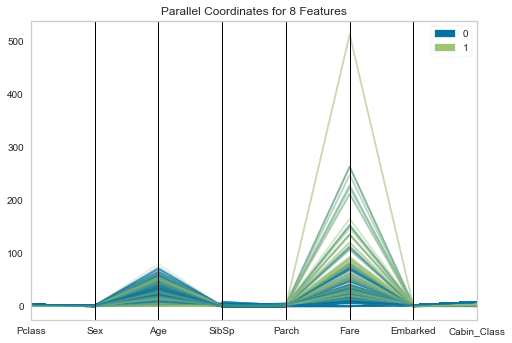

In [37]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.poof()

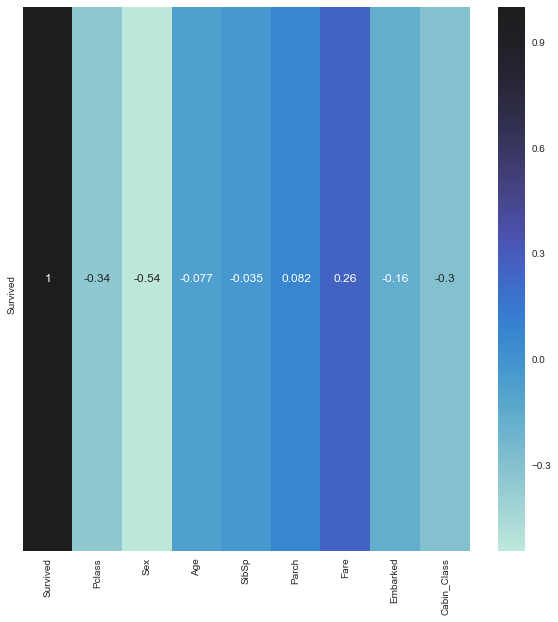

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corrwith(df['Survived']).values.reshape(1, -1), 
            xticklabels=df.columns,
            yticklabels=['Survived'],
           annot=True, center=True)

In [59]:
from yellowbrick.classifier import ClassificationReport

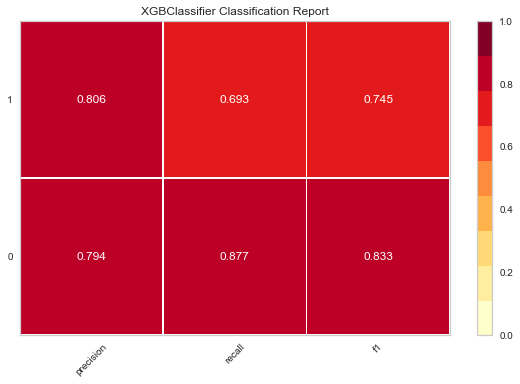

In [60]:
visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [61]:
from yellowbrick.features import Rank2D

c:\users\zbloss\appdata\local\programs\python\python36\lib\site-packages\yellowbrick\features\rankd.py:215: YellowbrickWarning:

RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.



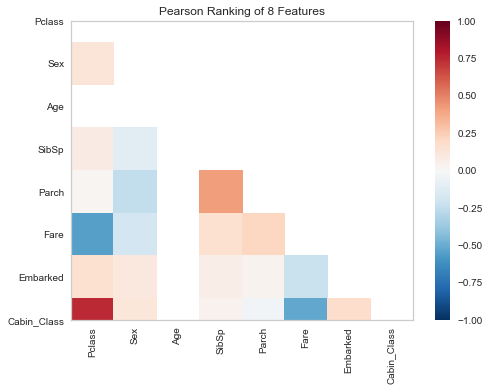

In [62]:
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

In [63]:
from yellowbrick.features import JointPlotVisualizer

In [98]:
from yellowbrick.features import RadViz
from yellowbrick.classifier import ROCAUC, ClassPredictionError
from yellowbrick.cluster import SilhouetteVisualizer

In [120]:
# Specify the target classes
classes = ['not_survived', 'survived']

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=X.columns)

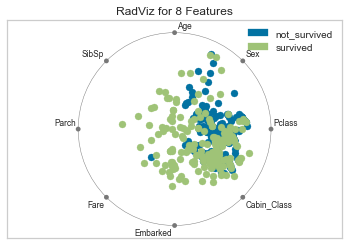

In [121]:
visualizer.fit(X_train, y_train)           # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

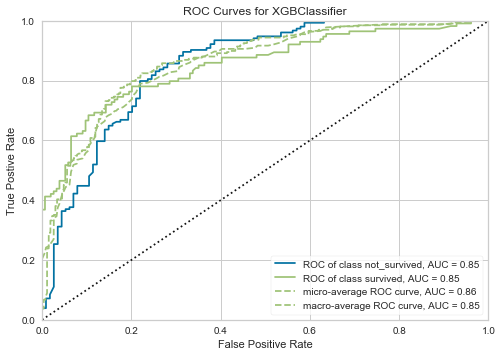

In [94]:
visualizer = ROCAUC(model, classes=['not_survived', 'survived'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data


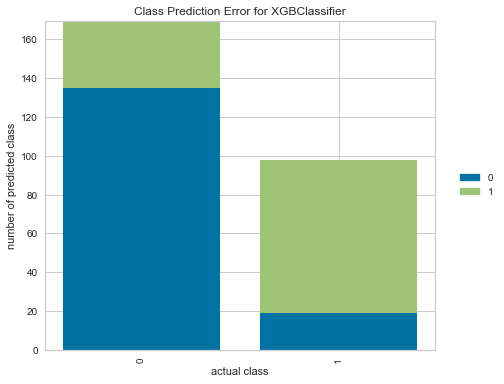

In [97]:
visualizer = ClassPredictionError(model=model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

c:\users\zbloss\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.

c:\users\zbloss\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.

c:\users\zbloss\appdata\local\programs\python\python36\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.



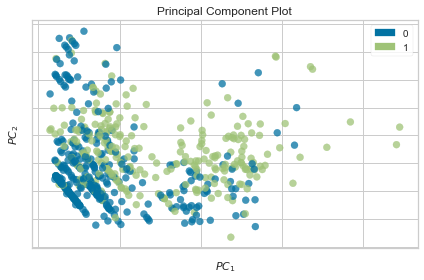

In [115]:

from yellowbrick.features.pca import PCADecomposition

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(X, y)
visualizer.poof()